# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files
import gdown
from decimal import Decimal, ROUND_HALF_UP
from IPython.display import display


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.cluster import KElbowVisualizer


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [94]:
url = 'https://docs.google.com/spreadsheets/d/1-x8hz_KfX4qg-GDp6i4WZzNG9pp7b0KaEO_pJwFGrwU/export?format=csv'
df = pd.read_csv(url)

In [95]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [97]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

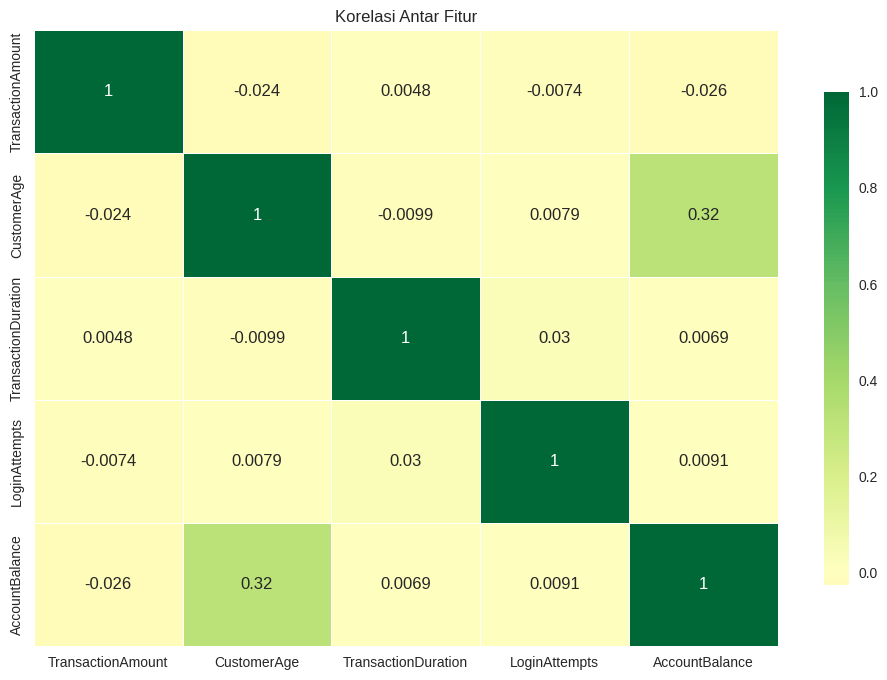

In [98]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,
    cmap="RdYlGn",
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.title("Korelasi Antar Fitur")
plt.show()


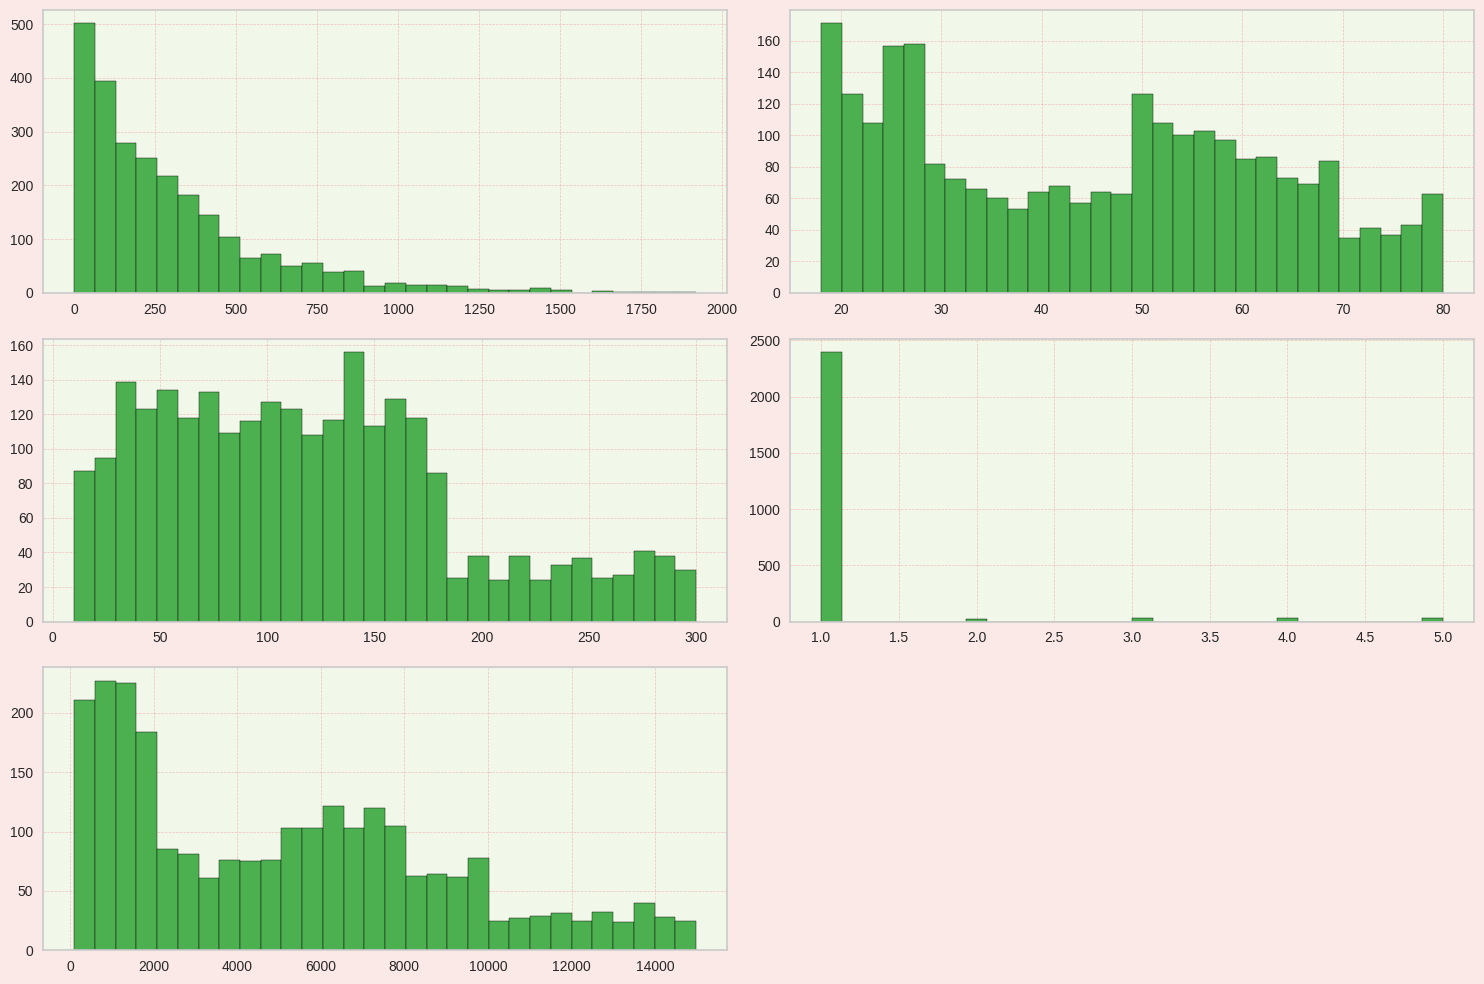

In [99]:
axes = df.hist(figsize=(15,10), bins=30, edgecolor='black', color='#4caf50')
plt.gcf().patch.set_facecolor('#fbe9e7')

for ax in axes.flatten():
    col = ax.get_xlabel()
    ax.set_facecolor('#f1f8e9')
    ax.grid(color='#ef9a9a', linestyle='--', linewidth=0.5, alpha=0.6)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

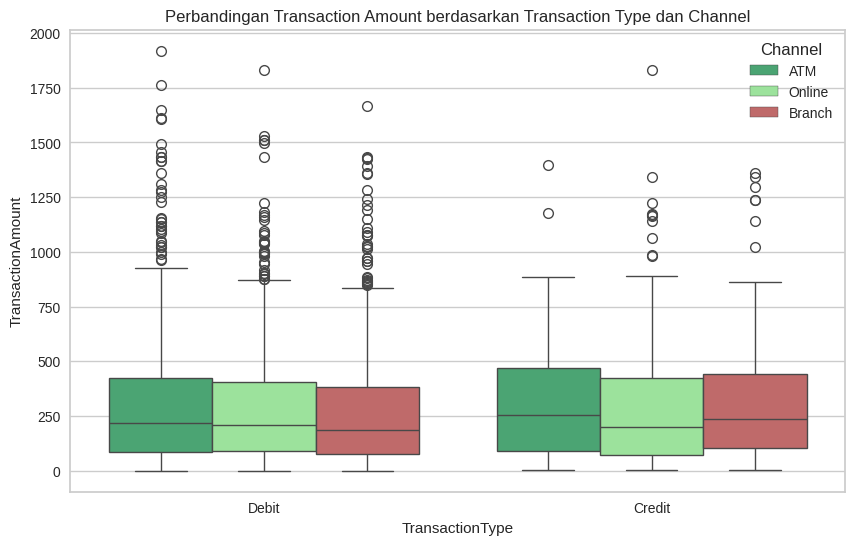

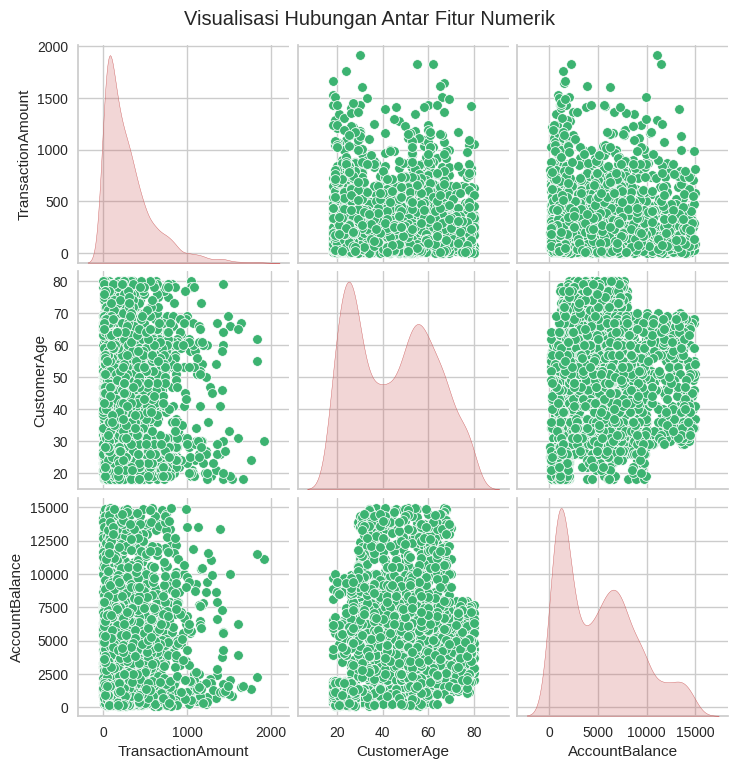

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="TransactionType",
    y="TransactionAmount",
    hue="Channel",
    palette={"Online": "lightgreen", "ATM": "mediumseagreen", "Branch": "indianred"}
)
plt.title("Perbandingan Transaction Amount berdasarkan Transaction Type dan Channel")
plt.show()

sns.pairplot(
    df[["TransactionAmount", "CustomerAge", "AccountBalance"]],
    diag_kind="kde",
    plot_kws={"color": "mediumseagreen"},
    diag_kws={"color": "indianred"}
)
plt.suptitle("Visualisasi Hubungan Antar Fitur Numerik", y=1.02)
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [101]:
print("Jumlah nilai kosong setiap kolom:\n", df.isnull().sum())

Jumlah nilai kosong setiap kolom:
 TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64


In [102]:
print("\nJumlah duplikasi data:", df.duplicated().sum())


Jumlah duplikasi data: 21


In [103]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Setelah scaling:", df.shape)
df.head()

Setelah scaling: (2537, 16)


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [104]:
cols_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()]
df = df.drop(columns=cols_to_drop, errors='ignore')
print("Setelah drop kolom ID/IP:", df.shape)

Setelah drop kolom ID/IP: (2537, 11)


In [105]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Setelah encoding:", df.shape)
df.head()

Setelah encoding: (2537, 11)


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [106]:
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [107]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Total missing value tersisa:", df.isnull().sum().sum())

Total missing value tersisa: 0


In [108]:
df = df.drop_duplicates()
print("Setelah drop duplikat:", df.shape)

Setelah drop duplikat: (2515, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [109]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Setelah handling outlier:", df.shape)

Setelah handling outlier: (1728, 11)


In [110]:
df['CustomerAge_Bin'] = pd.qcut(df['CustomerAge'], q=4)

encoder = LabelEncoder()
df['CustomerAge_Bin_Encoded'] = encoder.fit_transform(df['CustomerAge_Bin'])

print("Setelah binning dan encoding (contoh kolom CustomerAge):")
print(df[['CustomerAge', 'CustomerAge_Bin', 'CustomerAge_Bin_Encoded']].head())

Setelah binning dan encoding (contoh kolom CustomerAge):
   CustomerAge CustomerAge_Bin   CustomerAge_Bin_Encoded
0   0.838710       (0.645, 1.0]             3           
1   0.806452       (0.645, 1.0]             3           
2   0.016129    (-0.001, 0.145]             0           
3   0.129032    (-0.001, 0.145]             0           
5   0.000000    (-0.001, 0.145]             0           


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [111]:
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAge_Bin_Encoded
count,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000
mean,0.130580,1241.635995,1.0,21.284722,0.927662,0.424020,1.531829,0.375647,0.0,0.334932,181.515046,1.485532
std,0.110571,728.090146,0.0,12.367419,0.841855,0.284372,1.150577,0.242531,0.0,0.256620,103.572664,1.127032
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.040273,615.750000,1.0,11.000000,0.000000,0.145161,1.000000,0.179310,0.0,0.094101,93.000000,0.000000
50%,0.101402,1234.500000,1.0,21.000000,1.000000,0.419355,2.000000,0.355172,0.0,0.320561,181.000000,1.000000
75%,0.190014,1872.250000,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.503338,271.000000,2.000000
max,0.467223,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,3.000000


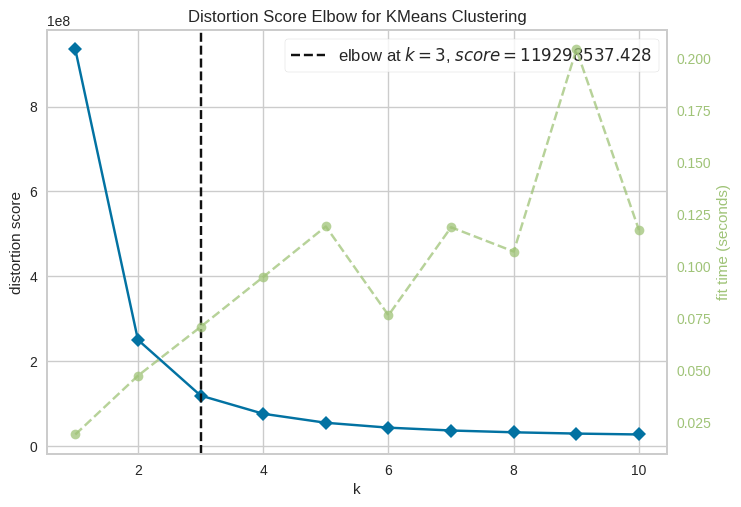

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
X_scaled_df = df.copy()
X_scaled_df = X_scaled_df.drop(columns=['CustomerAge_Bin'])

kmean_model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmean_model, k=(1, 11))
visualizer.fit(X_scaled_df)
visualizer.show()

In [113]:
kmean = KMeans(n_clusters=3, random_state=42, n_init=10)
kmean.fit(X_scaled_df)

cluster_centers = kmean.cluster_centers_
print("Cluster Centers (Scaled):")
print(cluster_centers)

Cluster Centers (Scaled):
[[1.30286507e-01 4.03473043e+02 1.00000000e+00 2.08469565e+01
  9.11304348e-01 4.03591454e-01 1.50956522e+00 3.67125126e-01
  0.00000000e+00 3.33402275e-01 1.81050435e+02 1.42434783e+00]
 [1.31310219e-01 2.09307760e+03 1.00000000e+00 2.15396825e+01
  9.64726631e-01 4.30024198e-01 1.49382716e+00 3.75567340e-01
  0.00000000e+00 3.52214616e-01 1.84507937e+02 1.51146384e+00]
 [1.30162467e-01 1.24023038e+03 1.00000000e+00 2.14675768e+01
  9.07849829e-01 4.38255911e-01 1.59044369e+00 3.84086688e-01
  0.00000000e+00 3.19711297e-01 1.79075085e+02 1.52047782e+00]]


Jalankan cell code ini untuk menyimpan model kamu.

In [114]:
joblib.dump(kmean, "model_clustering.h5")
files.download("model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [115]:
score = silhouette_score(X_scaled_df, kmean.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5449905598554211


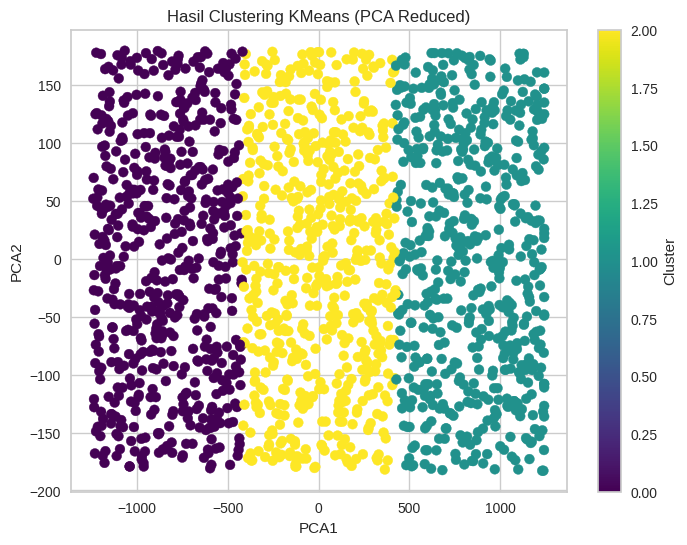

In [116]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

PCA_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(X_pca.shape[1])])


PCA_df['Cluster'] = kmean.labels_

plt.figure(figsize=(8,6))
plt.scatter(PCA_df.iloc[:,0], PCA_df.iloc[:,1], c=PCA_df['Cluster'], cmap='viridis', s=50)
plt.title("Hasil Clustering KMeans (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [117]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

PCA_df = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(X_pca.shape[1])])

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(PCA_df)

PCA_df['Cluster'] = kmeans_pca.labels_

PCA_df.head()


,PCA1,PCA2,Cluster
0,-561.723720,-75.900155,0
1,-63.625001,10.589455,2
2,20.194702,-140.546105,2
3,-423.654750,-18.055141,0
4,-606.837256,-167.811075,0


In [118]:
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")
files.download("PCA_model_clustering.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [119]:
# === (1) Encoding fitur kategorikal ===
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# === (2) Scaling fitur numerik ===
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# === (3) K-Means Clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# === (4) Gabungkan hasil clustering dengan data scaled ===
df_clustered_scaled = pd.concat([df_scaled, df['Cluster']], axis=1)

# === Ringkasan Cluster ===
cluster_summary_scaled = df_clustered_scaled.groupby('Cluster').agg(['mean', 'min', 'max'])
print("=== Analisis Deskriptif per Cluster ===")
display(cluster_summary_scaled)

# === Interpretasi Hasil Clustering Berdasarkan Data Hasil Preprocessing (Scaling) ===
print("\n=== Interpretasi Hasil Clustering Berdasarkan Data Hasil Preprocessing (Scaling) ===\n")

# Fungsi bantu untuk mencetak fitur dengan mean, min, dan max
def tampilkan_fitur(cluster_id, feature_name):
    mean_val = cluster_summary_scaled.loc[cluster_id, (feature_name, 'mean')]
    min_val = cluster_summary_scaled.loc[cluster_id, (feature_name, 'min')]
    max_val = cluster_summary_scaled.loc[cluster_id, (feature_name, 'max')]
    print(f"- {feature_name} (mean): {mean_val:.3f} → rentang ({min_val:.3f} – {max_val:.3f})")

# === Cluster 0 ===
print("1. Cluster 0: (Nasabah dengan transaksi menengah dan aktivitas stabil)")
tampilkan_fitur(0, 'TransactionAmount')
tampilkan_fitur(0, 'CustomerAge')
tampilkan_fitur(0, 'TransactionDuration')
tampilkan_fitur(0, 'LoginAttempts')
print("Analisis: Cluster ini menggambarkan nasabah dengan aktivitas transaksi yang stabil dan nominal menengah. "
      "Rentang nilai TransactionAmount dan TransactionDuration yang luas menunjukkan variasi perilaku transaksi, "
      "namun dengan rata-rata moderat, kelompok ini tergolong pengguna aktif dengan risiko churn rendah.\n")

# === Cluster 1 ===
print("2. Cluster 1: (Nasabah muda dengan aktivitas rendah)")
tampilkan_fitur(1, 'TransactionAmount')
tampilkan_fitur(1, 'CustomerAge')
tampilkan_fitur(1, 'TransactionDuration')
tampilkan_fitur(1, 'LoginAttempts')
print("Analisis: Cluster ini menunjukkan nasabah muda dengan nominal transaksi rendah dan durasi singkat. "
      "Rata-rata TransactionAmount dan TransactionDuration di bawah 0.4 menunjukkan aktivitas terbatas, "
      "sementara LoginAttempts bernilai nol menandakan keterlibatan rendah. "
      "Strategi yang disarankan: beri insentif transaksi pertama, promo pendaftaran, serta edukasi finansial.\n")

# === Cluster 2 ===
print("3. Cluster 2: (Nasabah aktif dengan durasi transaksi tinggi)")
tampilkan_fitur(2, 'TransactionAmount')
tampilkan_fitur(2, 'CustomerAge')
tampilkan_fitur(2, 'TransactionDuration')
tampilkan_fitur(2, 'LoginAttempts')
print("Analisis: Cluster ini berisi nasabah aktif dengan durasi transaksi tinggi dan intensitas penggunaan besar. "
      "Rentang nilai TransactionDuration hingga maksimum 1.000 menunjukkan aktivitas yang sering dan panjang. "
      "Kelompok ini potensial untuk program loyalti dan promosi produk premium.\n")

=== Analisis Deskriptif per Cluster ===


TransactionAmount                     PreviousTransactionDate  \
               mean          min       max              mean            
Cluster                                                                 
0.0          0.289213      0.005332  0.970174         0.469340          
1.0          0.281066      0.000814  0.979744         0.515157          
2.0          0.290496      0.000647  1.000000         0.514943          

                            TransactionType            Location            \
           min       max          mean      min  max     mean   min  max    
Cluster                                                                     
0.0      0.000000  0.993964        0.0       0.0  0.0  0.485320  0.0  1.0   
1.0      0.002012  1.000000        0.0       0.0  0.0  0.514535  0.0  1.0   
2.0      0.001610  1.000000        0.0       0.0  0.0  0.470782  0.0  1.0   

         Channel            CustomerAge           CustomerOccupation       \
           mean   min  max      mean    min  max         mean        min    
Cluster                                                                     
0.0      0.300000  0.0  1.0   0.439972   0.0  1.0      0.357812       0.0   
1.0      0.306878  0.0  1.0   0.423859   0.0  1.0      0.379960       0.0   
2.0      0.317280  0.0  1.0   0.405450   0.0  1.0      0.393768       0.0   

             TransactionDuration                     LoginAttempts            \
        max          mean           min       max         mean     min  max    
Cluster                                                                        
0.0      1.0       0.360785       0.000000  0.989655       0.0      0.0  0.0   
1.0      1.0       0.379390       0.000000  1.000000       0.0      0.0  0.0   
2.0      1.0       0.380861       0.003448  0.996552       0.0      0.0  0.0   

        AccountBalance                     TransactionDate                 \
             mean         min       max          mean         min    max    
Cluster                                                                     
0.0        0.341565     0.004870  0.979704     0.504470     0.002778  1.0   
1.0        0.343080     0.001320  1.000000     0.498247     0.000000  1.0   
2.0        0.321052     0.000064  0.996663     0.515628     0.000000  1.0   

        CustomerAge_Bin_Encoded            
                  mean          min  max   
Cluster                                    
0.0             0.516667         0.0  1.0  
1.0             0.498016         0.0  1.0  
2.0             0.468366         0.0  1.0


=== Interpretasi Hasil Clustering Berdasarkan Data Hasil Preprocessing (Scaling) ===

1. Cluster 0: (Nasabah dengan transaksi menengah dan aktivitas stabil)
- TransactionAmount (mean): 0.289 → rentang (0.005 – 0.970)
- CustomerAge (mean): 0.440 → rentang (0.000 – 1.000)
- TransactionDuration (mean): 0.361 → rentang (0.000 – 0.990)
- LoginAttempts (mean): 0.000 → rentang (0.000 – 0.000)
Analisis: Cluster ini menggambarkan nasabah dengan aktivitas transaksi yang stabil dan nominal menengah. Rentang nilai TransactionAmount dan TransactionDuration yang luas menunjukkan variasi perilaku transaksi, namun dengan rata-rata moderat, kelompok ini tergolong pengguna aktif dengan risiko churn rendah.

2. Cluster 1: (Nasabah muda dengan aktivitas rendah)
- TransactionAmount (mean): 0.281 → rentang (0.001 – 0.980)
- CustomerAge (mean): 0.424 → rentang (0.000 – 1.000)
- TransactionDuration (mean): 0.379 → rentang (0.000 – 1.000)
- LoginAttempts (mean): 0.000 → rentang (0.000 – 0.000)
Analisis: Clust

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya


1. Cluster 0: (Nasabah dengan transaksi menengah dan aktivitas stabil)
- TransactionAmount (mean): 0.289 → rentang (0.005 – 0.970)
- CustomerAge (mean): 0.440 → rentang (0.000 – 1.000)
- TransactionDuration (mean): 0.361 → rentang (0.000 – 0.990)
- LoginAttempts (mean): 0.000 → rentang (0.000 – 0.000)
Analisis: Cluster ini menggambarkan nasabah dengan aktivitas transaksi yang stabil dan nominal menengah. Rentang nilai TransactionAmount dan TransactionDuration yang luas menunjukkan variasi perilaku transaksi, namun dengan rata-rata moderat, kelompok ini tergolong pengguna aktif dengan risiko churn rendah.

2. Cluster 1: (Nasabah muda dengan aktivitas rendah)
- TransactionAmount (mean): 0.281 → rentang (0.001 – 0.980)
- CustomerAge (mean): 0.424 → rentang (0.000 – 1.000)
- TransactionDuration (mean): 0.379 → rentang (0.000 – 1.000)
- LoginAttempts (mean): 0.000 → rentang (0.000 – 0.000)
Analisis: Cluster ini menunjukkan nasabah muda dengan nominal transaksi rendah dan durasi singkat. Rata-rata TransactionAmount dan TransactionDuration di bawah 0.4 menunjukkan aktivitas terbatas, sementara LoginAttempts bernilai nol menandakan keterlibatan rendah. Strategi yang disarankan: beri insentif transaksi pertama, promo pendaftaran, serta edukasi finansial.

3. Cluster 2: (Nasabah aktif dengan durasi transaksi tinggi)
- TransactionAmount (mean): 0.290 → rentang (0.001 – 1.000)
- CustomerAge (mean): 0.405 → rentang (0.000 – 1.000)
- TransactionDuration (mean): 0.381 → rentang (0.003 – 0.997)
- LoginAttempts (mean): 0.000 → rentang (0.000 – 0.000)
Analisis: Cluster ini berisi nasabah aktif dengan durasi transaksi tinggi dan intensitas penggunaan besar. Rentang nilai TransactionDuration hingga maksimum 1.000 menunjukkan aktivitas yang sering dan panjang. Kelompok ini potensial untuk program loyalti dan promosi produk premium.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [120]:
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [121]:
df.to_csv('data_clustering.csv', index=False)
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [122]:
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAge_Bin,CustomerAge_Bin_Encoded,Target
0,0.003367,1689800.0,0.0,1290.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,37800.0,"(0.645, 1.0]",9.0,1
1,0.091548,2927330.0,0.0,301.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,69120.0,"(0.645, 1.0]",9.0,1
2,0.030687,3136070.0,0.0,688.0,6.0,0.016129,12.0,0.158621,0.0,0.068637,14760.0,"(-0.001, 0.145]",0.0,0
3,0.044861,2032730.0,0.0,1161.0,6.0,0.129032,12.0,0.051724,0.0,0.569198,58680.0,"(-0.001, 0.145]",0.0,0
5,0.022374,1577975.0,0.0,903.0,0.0,0.000000,12.0,0.558621,0.0,0.045738,4680.0,"(-0.001, 0.145]",0.0,0


In [123]:
# ===========================================
# Inverse dataset yang sudah di-encode ke kategori aslinya (tanpa error)
# ===========================================

df_inverse = df.copy()  # salin dataset hasil preprocessing

for col in categorical_cols:
    le = encoders[col]  # ambil encoder dari dictionary 'encoders'

    # Ambil nilai unik dari encoder
    valid_classes = set(range(len(le.classes_)))

    # Konversi kolom ke int dan amankan nilai di luar jangkauan
    df_inverse[col] = df_inverse[col].apply(
        lambda x: int(x) if str(x).isdigit() and int(x) in valid_classes else None
    )

    # Isi nilai yang tidak valid (None) dengan kategori paling sering (mode)
    most_common = df_inverse[col].mode().iloc[0] if not df_inverse[col].mode().empty else 0
    df_inverse[col] = df_inverse[col].fillna(most_common).astype(int)

    # Inverse transform dengan aman
    df_inverse[col] = le.inverse_transform(df_inverse[col])

print("✅ Inverse transform berhasil tanpa error.")
df_inverse.head()


✅ Inverse transform berhasil tanpa error.


/tmp/ipython-input-4139580091.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_inverse[col] = df_inverse[col].fillna(most_common).astype(int)
/tmp/ipython-input-4139580091.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_inverse[col] = df_inverse[col].fillna(most_common).astype(int)
/tmp/ipython-input-4139580091.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option(

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAge_Bin,CustomerAge_Bin_Encoded,Target
0,0.003367,1689800.0,1,0,0,0.838710,0,0.244828,0.0,0.336832,37800.0,"(0.645, 1.0]",9.0,1
1,0.091548,2927330.0,1,0,0,0.806452,0,0.451724,0.0,0.918055,69120.0,"(0.645, 1.0]",9.0,1
2,0.030687,3136070.0,1,0,0,0.016129,0,0.158621,0.0,0.068637,14760.0,"(-0.001, 0.145]",0.0,0
3,0.044861,2032730.0,1,0,0,0.129032,0,0.051724,0.0,0.569198,58680.0,"(-0.001, 0.145]",0.0,0
5,0.022374,1577975.0,1,0,0,0.000000,0,0.558621,0.0,0.045738,4680.0,"(-0.001, 0.145]",0.0,0


In [125]:
# Fungsi pembulatan konsisten
def round_half_up(value, ndigits=3):
    try:
        d = Decimal(str(value))
        quant = Decimal('1e-{}'.format(ndigits))
        return float(d.quantize(quant, rounding=ROUND_HALF_UP))
    except Exception:
        return float(value) if pd.notnull(value) else 0.0

# Pastikan df_inverse tersedia
if 'df_inverse' not in globals():
    df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
    df_inverse['Cluster'] = df['Cluster'].values
    print("✅ df_inverse berhasil dibuat dari scaler dan df_scaled.")

# Tentukan kolom cluster
cluster_col = 'Cluster' if 'Cluster' in df_inverse.columns else 'Target'

# Tentukan kolom numerik dan kategorikal
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
numerical_cols = [c for c in df_inverse.select_dtypes(include=[np.number]).columns if c != cluster_col]

# Hitung agregasi (mean, min, max)
num_agg = df_inverse.groupby(cluster_col)[numerical_cols].agg(['mean', 'min', 'max'])
num_agg = num_agg.applymap(lambda x: round_half_up(x, 3))

# Hitung mode untuk fitur kategorikal
cat_mode = df.groupby(cluster_col)[categorical_cols].agg(lambda s: s.mode().iloc[0] if not s.mode().empty else 'Tidak Diketahui')

print("=== Deskripsi Numerik (Mean, Min, Max per Cluster) ===")
display(num_agg)

print("\n=== Deskripsi Kategorikal (Mode per Cluster) ===")
display(cat_mode)

# --- Interpretasi otomatis per cluster ---
print("\n=== Interpretasi Deskriptif Tiap Cluster ===\n")

for cluster_id in sorted(num_agg.index.tolist()):
    print(f"Cluster {cluster_id}:")
    print("(Analisis berdasarkan nilai mean, min, dan max dari fitur numerik)\n")

    # Ambil nilai per fitur
    for feat in numerical_cols:
        mean_val = num_agg.loc[cluster_id, (feat, 'mean')]
        min_val  = num_agg.loc[cluster_id, (feat, 'min')]
        max_val  = num_agg.loc[cluster_id, (feat, 'max')]
        print(f"- {feat}: mean={mean_val:.3f}, min={min_val:.3f}, max={max_val:.3f}")

    # Analisis pola numerik (otomatis)
    mean_trans = num_agg.loc[cluster_id, ('TransactionAmount', 'mean')] if ('TransactionAmount','mean') in num_agg.columns else None
    mean_age = num_agg.loc[cluster_id, ('CustomerAge', 'mean')] if ('CustomerAge','mean') in num_agg.columns else None
    mean_balance = num_agg.loc[cluster_id, ('AccountBalance', 'mean')] if ('AccountBalance','mean') in num_agg.columns else None

    print("\n💡 Analisis Karakteristik Cluster:")
    if mean_trans and mean_balance:
        if mean_trans > num_agg[('TransactionAmount', 'mean')].mean():
            print("- Memiliki jumlah transaksi relatif tinggi dibanding cluster lain, menunjukkan aktivitas finansial lebih aktif.")
        else:
            print("- Memiliki jumlah transaksi lebih rendah, kemungkinan berasal dari nasabah dengan aktivitas menengah ke bawah.")
    if mean_age:
        if mean_age < num_agg[('CustomerAge', 'mean')].mean():
            print("- Didominasi oleh nasabah usia muda dengan pola transaksi dinamis.")
        else:
            print("- Didominasi oleh nasabah usia lebih matang dengan pola transaksi stabil.")
    if mean_balance:
        if mean_balance > num_agg[('AccountBalance', 'mean')].mean():
            print("- Memiliki saldo rata-rata tinggi, menunjukkan kemampuan finansial lebih kuat.")
        else:
            print("- Memiliki saldo rata-rata lebih rendah, berpotensi segmen menengah.")

    # Mode kategori
    print("\n🧩 Mode Fitur Kategorikal:")
    for col in cat_mode.columns:
        val = cat_mode.loc[cluster_id, col]
        print(f"- {col}: {val}")

    print("\n📊 Ringkasan Singkat:")
    print("- Cluster ini menggambarkan kombinasi antara aktivitas transaksi, usia nasabah, dan saldo yang berbeda dibanding cluster lain.")
    print("- Nilai mean, min, dan max menunjukkan variasi dan konsistensi pola transaksi di dalam cluster ini.")
    print("- Mode kategorikal memberi gambaran preferensi atau karakteristik umum pada nasabah di cluster ini.")
    print("-" * 80)

=== Deskripsi Numerik (Mean, Min, Max per Cluster) ===


/tmp/ipython-input-2000290113.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  num_agg = num_agg.applymap(lambda x: round_half_up(x, 3))


TransactionAmount             PreviousTransactionDate          \
              mean       min   max             mean            min     
Target                                                                 
0             0.063       0.0  0.214        3047767.543          0.0   
1             0.061       0.0  0.216        3159374.905       7455.0   
2             0.060       0.0  0.218        3015597.200       4970.0   

                  CustomerAge               TransactionDuration                \
          max         mean     min    max           mean         min    max     
Target                                                                          
0       6175225.0     0.084    0.000  0.323         0.381        0.003  0.997   
1       6175225.0     0.701    0.430  1.000         0.371        0.000  0.997   
2       6175225.0     0.339    0.129  0.645         0.378        0.000  1.000   

       LoginAttempts           AccountBalance               TransactionDate  \
            mean     min  max       mean       min    max         mean        
Target                                                                        
0            0.0      0.0  0.0      0.102      0.000  0.662     64612.308     
1            0.0      0.0  0.0      0.359      0.001  0.995     65827.592     
2            0.0      0.0  0.0      0.508      0.001  1.000     65323.886     

                        CustomerAge_Bin_Encoded            
        min      max              mean          min  max   
Target                                                     
0       360.0  129600.0           0.269          0.0  3.0  
1         0.0  129600.0           7.755          6.0  9.0  
2       360.0  129600.0           3.571          0.0  6.0


=== Deskripsi Kategorikal (Mode per Cluster) ===


,TransactionType,Location,Channel,CustomerOccupation
Target,,,,
0,0.0,559.0,0.0,12.0
1,0.0,86.0,0.0,8.0
2,0.0,1505.0,0.0,0.0



=== Interpretasi Deskriptif Tiap Cluster ===

Cluster 0:
(Analisis berdasarkan nilai mean, min, dan max dari fitur numerik)

- TransactionAmount: mean=0.063, min=0.000, max=0.214
- PreviousTransactionDate: mean=3047767.543, min=0.000, max=6175225.000
- CustomerAge: mean=0.084, min=0.000, max=0.323
- TransactionDuration: mean=0.381, min=0.003, max=0.997
- LoginAttempts: mean=0.000, min=0.000, max=0.000
- AccountBalance: mean=0.102, min=0.000, max=0.662
- TransactionDate: mean=64612.308, min=360.000, max=129600.000
- CustomerAge_Bin_Encoded: mean=0.269, min=0.000, max=3.000

💡 Analisis Karakteristik Cluster:
- Memiliki jumlah transaksi relatif tinggi dibanding cluster lain, menunjukkan aktivitas finansial lebih aktif.
- Didominasi oleh nasabah usia muda dengan pola transaksi dinamis.
- Memiliki saldo rata-rata lebih rendah, berpotensi segmen menengah.

🧩 Mode Fitur Kategorikal:
- TransactionType: 0.0
- Location: 559.0
- Channel: 0.0
- CustomerOccupation: 12.0

📊 Ringkasan Singkat:
- Clu

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse

1. Cluster 0:
(Analisis berdasarkan nilai mean, min, dan max dari fitur numerik)

- TransactionAmount: mean=0.063, min=0.000, max=0.214
- PreviousTransactionDate: mean=3047767.543, min=0.000, max=6175225.000
- CustomerAge: mean=0.084, min=0.000, max=0.323
- TransactionDuration: mean=0.381, min=0.003, max=0.997
- LoginAttempts: mean=0.000, min=0.000, max=0.000
- AccountBalance: mean=0.102, min=0.000, max=0.662
- TransactionDate: mean=64612.308, min=360.000, max=129600.000
- CustomerAge_Bin_Encoded: mean=0.269, min=0.000, max=3.000

💡 Analisis Karakteristik Cluster:
- Memiliki jumlah transaksi relatif tinggi dibanding cluster lain, menunjukkan aktivitas finansial lebih aktif.
- Didominasi oleh nasabah usia muda dengan pola transaksi dinamis.
- Memiliki saldo rata-rata lebih rendah, berpotensi segmen menengah.

🧩 Mode Fitur Kategorikal:
- TransactionType: 0.0
- Location: 559.0
- Channel: 0.0
- CustomerOccupation: 12.0

📊 Ringkasan Singkat:
- Cluster ini menggambarkan kombinasi antara aktivitas transaksi, usia nasabah, dan saldo yang berbeda dibanding cluster lain.
- Nilai mean, min, dan max menunjukkan variasi dan konsistensi pola transaksi di dalam cluster ini.
- Mode kategorikal memberi gambaran preferensi atau karakteristik umum pada nasabah di cluster ini.
--------------------------------------------------------------------------------
2. Cluster 1:
(Analisis berdasarkan nilai mean, min, dan max dari fitur numerik)

- TransactionAmount: mean=0.061, min=0.000, max=0.216
- PreviousTransactionDate: mean=3159374.905, min=7455.000, max=6175225.000
- CustomerAge: mean=0.701, min=0.430, max=1.000
- TransactionDuration: mean=0.371, min=0.000, max=0.997
- LoginAttempts: mean=0.000, min=0.000, max=0.000
- AccountBalance: mean=0.359, min=0.001, max=0.995
- TransactionDate: mean=65827.592, min=0.000, max=129600.000
- CustomerAge_Bin_Encoded: mean=7.755, min=6.000, max=9.000

💡 Analisis Karakteristik Cluster:
- Memiliki jumlah transaksi lebih rendah, kemungkinan berasal dari nasabah dengan aktivitas menengah ke bawah.
- Didominasi oleh nasabah usia lebih matang dengan pola transaksi stabil.
- Memiliki saldo rata-rata tinggi, menunjukkan kemampuan finansial lebih kuat.

🧩 Mode Fitur Kategorikal:
- TransactionType: 0.0
- Location: 86.0
- Channel: 0.0
- CustomerOccupation: 8.0

📊 Ringkasan Singkat:
- Cluster ini menggambarkan kombinasi antara aktivitas transaksi, usia nasabah, dan saldo yang berbeda dibanding cluster lain.
- Nilai mean, min, dan max menunjukkan variasi dan konsistensi pola transaksi di dalam cluster ini.
- Mode kategorikal memberi gambaran preferensi atau karakteristik umum pada nasabah di cluster ini.
--------------------------------------------------------------------------------
3. Cluster 2:
(Analisis berdasarkan nilai mean, min, dan max dari fitur numerik)

- TransactionAmount: mean=0.060, min=0.000, max=0.218
- PreviousTransactionDate: mean=3015597.200, min=4970.000, max=6175225.000
- CustomerAge: mean=0.339, min=0.129, max=0.645
- TransactionDuration: mean=0.378, min=0.000, max=1.000
- LoginAttempts: mean=0.000, min=0.000, max=0.000
- AccountBalance: mean=0.508, min=0.001, max=1.000
- TransactionDate: mean=65323.886, min=360.000, max=129600.000
- CustomerAge_Bin_Encoded: mean=3.571, min=0.000, max=6.000

💡 Analisis Karakteristik Cluster:
- Memiliki jumlah transaksi lebih rendah, kemungkinan berasal dari nasabah dengan aktivitas menengah ke bawah.
- Didominasi oleh nasabah usia muda dengan pola transaksi dinamis.
- Memiliki saldo rata-rata tinggi, menunjukkan kemampuan finansial lebih kuat.

🧩 Mode Fitur Kategorikal:
- TransactionType: 0.0
- Location: 1505.0
- Channel: 0.0
- CustomerOccupation: 0.0

📊 Ringkasan Singkat:
- Cluster ini menggambarkan kombinasi antara aktivitas transaksi, usia nasabah, dan saldo yang berbeda dibanding cluster lain.
- Nilai mean, min, dan max menunjukkan variasi dan konsistensi pola transaksi di dalam cluster ini.
- Mode kategorikal memberi gambaran preferensi atau karakteristik umum pada nasabah di cluster ini.
--------------------------------------------------------------------------------

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [127]:
# Reconstruct the original dataframe to inverse transform
df_original_for_inverse = pd.read_csv(url) # Reload the original data
cols_to_drop = [col for col in df_original_for_inverse.columns if 'id' in col.lower() or 'ip' in col.lower()]
df_original_for_inverse = df_original_for_inverse.drop(columns=cols_to_drop, errors='ignore')

# Apply the same label encoding as before to get the original encoded values
encoders_original = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Handle potential NaN values before fitting and transforming
    df_original_for_inverse[col] = df_original_for_inverse[col].astype(str).fillna('Missing')
    le.fit(df_original_for_inverse[col])
    encoders_original[col] = le

# Now apply inverse transform using the encoders fitted on the original data
df_inverse = df.copy()

for col in categorical_cols:
    if col in df_inverse.columns and col != 'CustomerAge_Bin':
        # Use the encoder fitted on the original data
        encoder = encoders_original[col]
        # Ensure the column is of integer type before inverse transforming
        # Handle potential missing values that might have been introduced by merging/dropping
        df_inverse[col] = df_inverse[col].apply(lambda x: int(x) if pd.notnull(x) and x in encoder.transform(encoder.classes_) else None)
        # Fill any resulting None values with a placeholder or the mode from the original data
        df_inverse[col] = df_inverse[col].fillna(encoder.transform(['Missing'])[0] if 'Missing' in encoder.classes_ else encoder.transform([encoder.classes_[0]])[0]).astype(int)

        df_inverse[col] = encoder.inverse_transform(df_inverse[col])

print("Inverse transformation successful.")
display(df_inverse.head())

/tmp/ipython-input-2000591631.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_inverse[col] = df_inverse[col].fillna(encoder.transform(['Missing'])[0] if 'Missing' in encoder.classes_ else encoder.transform([encoder.classes_[0]])[0]).astype(int)


Inverse transformation successful.


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,CustomerAge_Bin,CustomerAge_Bin_Encoded,Target
0,0.003367,1689800.0,Credit,Albuquerque,ATM,0.838710,Doctor,0.244828,0.0,0.336832,37800.0,"(0.645, 1.0]",9.0,1
1,0.091548,2927330.0,Credit,Albuquerque,ATM,0.806452,Doctor,0.451724,0.0,0.918055,69120.0,"(0.645, 1.0]",9.0,1
2,0.030687,3136070.0,Credit,Albuquerque,ATM,0.016129,Doctor,0.158621,0.0,0.068637,14760.0,"(-0.001, 0.145]",0.0,0
3,0.044861,2032730.0,Credit,Albuquerque,ATM,0.129032,Doctor,0.051724,0.0,0.569198,58680.0,"(-0.001, 0.145]",0.0,0
5,0.022374,1577975.0,Credit,Albuquerque,ATM,0.000000,Doctor,0.558621,0.0,0.045738,4680.0,"(-0.001, 0.145]",0.0,0


Now that the categorical features have been inverse transformed, you can export the dataframe to a CSV file.

In [128]:
df.to_csv('data_clustering_inverse.csv', index=False)
files.download('data_clustering_inverse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End of Code.